In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class ProcessPitcherData:
    def load_pitcher_data(self, pitcher_data_file):
        # load pitcher data
        pitcher_data = pd.read_csv(pitcher_data_file)
        return pitcher_data

In [3]:
# file path for pitcher data
pitcher_data_file = 'fangraphs_season_level.csv'

# create instance of ProcessPitcherData class
process_pitcher_data = ProcessPitcherData()

# load pitcher data
pitcher_data = process_pitcher_data.load_pitcher_data(pitcher_data_file)

pitcher_data.head()

,PlayerId,MLBAMID,Name,NameASCII,Throws,Season,Age,Team,Role,G,...,Pit_plus_FC,Stf_plus_FS,Loc_plus_FS,Pit_plus_FS,Stf_plus_FO,Loc_plus_FO,Pit_plus_FO,Stuff_plus,Location_plus,Pitching_plus
0,18,491703,NeftalÃ­ Feliz,Neftali Feliz,R,2021,33,- - -,RP,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.316418,95.123881,95.873134
1,1157,488984,Tommy Hunter,Tommy Hunter,R,2021,34,NYM,RP,3,...,103.100000,NaN,NaN,NaN,NaN,NaN,NaN,86.285556,94.884444,95.112222
2,1159,461865,Andrew Romine,Andrew Romine,R,2021,35,CHC,RP,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.925000,108.425000,99.200000
3,1246,456713,Matt Bush,Matt Bush,R,2021,35,TEX,RP,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.852174,98.340580,102.611594
4,1247,493603,Adam Ottavino,Adam Ottavino,R,2021,35,BOS,RP,69,...,66.583333,NaN,NaN,NaN,NaN,NaN,NaN,116.269527,94.625394,102.238617


In [4]:
# import 
pitcher_delta_df = pd.read_csv('pitcher_delta_grade.csv')

# Drop name column
pitcher_delta_df = pitcher_delta_df.drop(columns=['player_name'])

pitcher_delta_df.head()

,delta_diff,delta_avg,MLBAMID
0,0.012000,-0.085667,663897
1,0.132329,-0.080487,596112
2,0.010583,-0.073286,641525
3,0.054542,-0.072396,600986
4,0.111389,-0.064529,570731


In [5]:
# merge dataframes
pitcher_data = pd.merge(pitcher_data, pitcher_delta_df, on='MLBAMID')

pitcher_data.head()

,PlayerId,MLBAMID,Name,NameASCII,Throws,Season,Age,Team,Role,G,...,Loc_plus_FS,Pit_plus_FS,Stf_plus_FO,Loc_plus_FO,Pit_plus_FO,Stuff_plus,Location_plus,Pitching_plus,delta_diff,delta_avg
0,1157,488984,Tommy Hunter,Tommy Hunter,R,2021,34,NYM,RP,3,...,NaN,NaN,NaN,NaN,NaN,86.285556,94.884444,95.112222,0.037060,0.008007
1,1157,488984,Tommy Hunter,Tommy Hunter,R,2022,35,NYM,RP,18,...,NaN,NaN,NaN,NaN,NaN,95.934758,108.332194,101.498006,0.037060,0.008007
2,1157,488984,Tommy Hunter,Tommy Hunter,R,2023,36,NYM,RP,14,...,NaN,NaN,NaN,NaN,NaN,82.804360,105.339510,100.527793,0.037060,0.008007
3,1157,488984,Tommy Hunter,Tommy Hunter,R,2021,34,NYM,SP,1,...,NaN,NaN,NaN,NaN,NaN,96.164706,114.752941,107.764706,0.037060,0.008007
4,1246,456713,Matt Bush,Matt Bush,R,2021,35,TEX,RP,4,...,NaN,NaN,NaN,NaN,NaN,124.852174,98.340580,102.611594,0.000057,0.014121


In [18]:
# thyago = pitcher_data[pitcher_data['Name'].str.contains('Ohtani')]

# thyago[['delta_diff','delta_avg',  'Name', 'Season']]

# Filter to MLBAMID to 488984
tommy = pitcher_data[pitcher_data['MLBAMID'] == 570731]

tommy


,PlayerId,MLBAMID,Name,NameASCII,Throws,Season,Age,Team,Role,G,...,Loc_plus_FS,Pit_plus_FS,Stf_plus_FO,Loc_plus_FO,Pit_plus_FO,Stuff_plus,Location_plus,Pitching_plus,delta_diff,delta_avg
1393,11265,570731,Jonathan Schoop,Jonathan Schoop,R,2023,31,DET,RP,1,...,NaN,NaN,NaN,NaN,NaN,-46.294118,102.388235,96.735294,0.111389,-0.064529


In [19]:
print(f"Pitcher data shape: {pitcher_data.shape}")

# 
print(f" Number of starting pitchers{pitcher_data[pitcher_data['Role'] == 'SP'].shape}")

#
print(f" Number of relief pitchers{pitcher_data[pitcher_data['Role'] == 'RP'].shape}")

Pitcher data shape: (2505, 310)
 Number of starting pitchers(947, 310)
 Number of relief pitchers(1558, 310)


In [20]:
# Filter data to 2023 season
pitcher_data = pitcher_data[pitcher_data['Season'] == 2023]

# Filter to only include number of innings pitched
pitcher_data = pitcher_data[pitcher_data['IP'] > 50]

print(pitcher_data.shape)


(331, 310)


In [25]:
print(f"Pitcher data shape: {pitcher_data.shape}")

# 
print(f" Number of starting pitchers{pitcher_data[pitcher_data['Role'] == 'SP'].shape}")

#
print(f" Number of relief pitchers{pitcher_data[pitcher_data['Role'] == 'RP'].shape}")

Pitcher data shape: (331, 310)
 Number of starting pitchers(176, 310)
 Number of relief pitchers(155, 310)


In [26]:
#
pitcher_data.sort_values('ERA', ascending=True)[['Name', 'ERA']].head(10)

,Name,ERA
167,Chris Martin,1.051949
900,Brusdar Graterol,1.239797
1800,Josh Hader,1.278107
1245,FÃ©lix Bautista,1.475410
1822,Tim Mayza,1.518751
455,Devin Williams,1.534090
160,Hector Neris,1.712196
502,Bryan Abreu,1.750000
2247,Tom Cosgrove,1.753248
1776,Hoby Milner,1.818654


In [27]:
# Filter column name containing Gerrit Cole
gerrit_cole = pitcher_data[pitcher_data['Name'].str.contains('Gerrit Cole')]
gerrit_cole[['Name', 'ERA', 'delta_diff', 'delta_avg']]

,Name,ERA,delta_diff,delta_avg
2325,Gerrit Cole,2.626794,0.000144,-0.013463


In [28]:
# Filter column name containing ohtani

ohtani_data = pitcher_data[pitcher_data['Name'].str.contains('Ohtani')]
ohtani_data

,PlayerId,MLBAMID,Name,NameASCII,Throws,Season,Age,Team,Role,G,...,Loc_plus_FS,Pit_plus_FS,Stf_plus_FO,Loc_plus_FO,Pit_plus_FO,Stuff_plus,Location_plus,Pitching_plus,delta_diff,delta_avg
2390,19755,660271,Shohei Ohtani,Shohei Ohtani,R,2023,28,LAA,SP,23,...,93.112687,106.797761,NaN,NaN,NaN,120.518243,95.504871,102.865855,0.003818,-0.009127


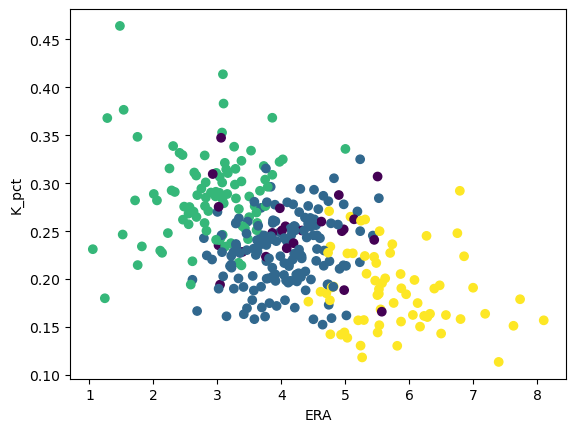

In [29]:
features = pitcher_data[['ERA', 'K_pct', 'WHIP', 'delta_diff', 'delta_avg']]

# Standardize the data
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Create a kmeans model on our data, using k clusters. Random_state helps ensure that the algorithm returns the same results each time.
model = KMeans(n_clusters=4, random_state=42)

# Use the fit method to fit the model to the features from the dataframe
pitcher_data['cluster'] = model.fit_predict(scaled_features)

# Create a scatter plot of the data, coloring by cluster
plt.scatter(pitcher_data['ERA'], pitcher_data['K_pct'], c=pitcher_data['cluster'], cmap='viridis')
plt.xlabel('ERA')
plt.ylabel('K_pct')

# Display the plot
plt.show()

In [30]:
pitcher_data[['Name', 'cluster']].head()

,Name,cluster
10,Adam Ottavino,2
15,Zack Greinke,1
36,Ryan Brasier,0
42,JosÃ© Cisnero,3
45,Craig Kimbrel,2


In [31]:
# Print value counts for each cluster
print(pitcher_data['cluster'].value_counts())

1    150
2     92
3     66
0     23
Name: cluster, dtype: int64


In [32]:
ohtani_data = pitcher_data[pitcher_data['Name'].str.contains('Ohtani')]
ohtani_data[['Name', 'ERA', 'K_pct', 'WHIP', 'cluster']]

,Name,ERA,K_pct,WHIP,cluster
2390,Shohei Ohtani,3.136364,0.3145,1.060606,2


In [33]:
gerrit_cole_data = pitcher_data[pitcher_data['Name'].str.contains('Gerrit')]

gerrit_cole_data[['Name', 'ERA', 'K_pct', 'WHIP', 'cluster']]

,Name,ERA,K_pct,WHIP,cluster
2325,Gerrit Cole,2.626794,0.2704,0.980861,2


In [34]:
blake_snell_data = pitcher_data[pitcher_data['Name'].str.contains('Blake Snell')]
blake_snell_data[['Name', 'ERA', 'K_pct', 'WHIP', 'cluster']]

,Name,ERA,K_pct,WHIP,cluster
2454,Blake Snell,2.25,0.3154,1.188889,2


In [35]:
cluster_4_df = pitcher_data[pitcher_data['cluster'] == 2]

cluster_4_df.head()

,PlayerId,MLBAMID,Name,NameASCII,Throws,Season,Age,Team,Role,G,...,Pit_plus_FS,Stf_plus_FO,Loc_plus_FO,Pit_plus_FO,Stuff_plus,Location_plus,Pitching_plus,delta_diff,delta_avg,cluster
10,1247,493603,Adam Ottavino,Adam Ottavino,R,2023,37,NYM,RP,66,...,NaN,NaN,NaN,NaN,100.091211,94.763281,95.718750,0.069955,-0.044033,2
45,6655,518886,Craig Kimbrel,Craig Kimbrel,R,2023,35,PHI,RP,71,...,NaN,NaN,NaN,NaN,125.195179,101.750893,114.085893,0.093141,-0.052338,2
69,7005,519151,Ryan Pressly,Ryan Pressly,R,2023,34,HOU,RP,65,...,NaN,NaN,NaN,NaN,155.627344,102.039844,117.085352,0.025308,-0.012841,2
99,8241,502085,David Robertson,David Robertson,R,2023,38,- - -,RP,62,...,NaN,NaN,NaN,NaN,124.911794,97.372018,105.078505,0.044598,-0.019587,2
160,11804,593576,Hector Neris,Hector Neris,R,2023,34,HOU,RP,71,...,103.281905,NaN,NaN,NaN,99.473993,98.831685,96.502656,0.031040,-0.032689,2


In [37]:
cluster_4_df.sort_values(by='ERA', ascending=True)[['Name', 'ERA', 'Role', 'delta_avg', 'delta_diff']].head(20)

,Name,ERA,Role,delta_avg,delta_diff
167,Chris Martin,1.051949,RP,-0.039294,0.008177
900,Brusdar Graterol,1.239797,RP,-0.030753,0.037828
1800,Josh Hader,1.278107,RP,-0.018375,0.009668
1245,FÃ©lix Bautista,1.475410,RP,-0.052545,0.059172
1822,Tim Mayza,1.518751,RP,-0.044487,0.054143
455,Devin Williams,1.534090,RP,-0.044550,0.038288
160,Hector Neris,1.712196,RP,-0.032689,0.031040
502,Bryan Abreu,1.750000,RP,-0.020875,0.007405
2247,Tom Cosgrove,1.753248,RP,-0.028323,0.031866
1776,Hoby Milner,1.818654,RP,-0.020337,0.012442


In [38]:
rp_cluster_4 = cluster_4_df[cluster_4_df['Role'] == 'RP']
# Print shape of relief pitcher cluster
print(rp_cluster_4.shape)
rp_cluster_4.sort_values(by='ERA', ascending=True)[['Name', 'ERA', 'Role', 'delta_avg', 'delta_diff']].head(10)

(68, 311)


,Name,ERA,Role,delta_avg,delta_diff
167,Chris Martin,1.051949,RP,-0.039294,0.008177
900,Brusdar Graterol,1.239797,RP,-0.030753,0.037828
1800,Josh Hader,1.278107,RP,-0.018375,0.009668
1245,FÃ©lix Bautista,1.475410,RP,-0.052545,0.059172
1822,Tim Mayza,1.518751,RP,-0.044487,0.054143
455,Devin Williams,1.534090,RP,-0.044550,0.038288
160,Hector Neris,1.712196,RP,-0.032689,0.031040
502,Bryan Abreu,1.750000,RP,-0.020875,0.007405
2247,Tom Cosgrove,1.753248,RP,-0.028323,0.031866
1776,Hoby Milner,1.818654,RP,-0.020337,0.012442


In [39]:
sp_cluster_4 = cluster_4_df[cluster_4_df['Role'] == 'SP']
# Print shape of starting pitcher cluster
print(sp_cluster_4.shape)
sp_cluster_4.sort_values(by='ERA', ascending=True)[['Name', 'ERA', 'Role','delta_avg', 'delta_diff']].head(20)

(24, 311)


,Name,ERA,Role,delta_avg,delta_diff
2454,Blake Snell,2.250000,SP,-0.023045,0.028536
2358,Brandon Woodruff,2.283582,SP,-0.017228,0.012114
2437,Clayton Kershaw,2.460753,SP,-0.017054,0.006123
2457,Max Fried,2.549355,SP,-0.011831,0.000144
2325,Gerrit Cole,2.626794,SP,-0.013463,0.000144
2243,Cole Ragans,2.637208,SP,-0.010064,0.005201
2062,Tarik Skubal,2.800831,SP,-0.016326,0.001286
2411,Kyle Bradish,2.828058,SP,-0.012125,0.006550
2434,Kodai Senga,2.975958,SP,-0.015829,0.021808
2432,Tanner Bibee,2.978873,SP,-0.015665,0.013818
